In [3]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
from pathlib import Path
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import warnings

In [2]:
# https://queirozf.com/entries/suppressing-ignoring-warnings-in-python-reference-and-examples
warnings.filterwarnings('ignore', message="PySoundFile failed. Trying audioread instead.")

In [22]:
df = pd.read_csv('../data/features_with_genres.csv', index_col=0)
df.head()

,chroma_cens_kurtosis_01,chroma_cens_kurtosis_02,chroma_cens_kurtosis_03,chroma_cens_kurtosis_04,chroma_cens_kurtosis_05,chroma_cens_kurtosis_06,chroma_cens_kurtosis_07,chroma_cens_kurtosis_08,chroma_cens_kurtosis_09,chroma_cens_kurtosis_10,...,zcr_kurtosis_01,zcr_max_01,zcr_mean_01,zcr_median_01,zcr_min_01,zcr_skew_01,zcr_std_01,track_genre_top,track_title,artist_name
track_id,,,,,,,,,,,,,,,,,,,,,
2,7.180653,5.230309,0.249321,1.347620,1.482478,0.531371,1.481593,2.691455,0.866868,1.341231,...,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448,Hip-Hop,Food,AWOL
5,0.527563,-0.077654,-0.279610,0.685883,1.937570,0.880839,-0.923192,-0.927232,0.666617,1.038546,...,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861,Hip-Hop,This World,AWOL
10,3.702245,-0.291193,2.196742,-0.234449,1.367364,0.998411,1.770694,1.604566,0.521217,1.982386,...,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800,Pop,Freeway,Kurt Vile
140,0.533579,-0.623885,-1.086205,-1.081079,-0.765151,-0.072282,-0.882913,-0.582376,-0.884749,-0.645214,...,11.052547,0.379395,0.052379,0.036621,0.001953,3.143968,0.057712,Folk,Queen Of The Wires,Alec K. Redfearn & the Eyesores
141,0.172898,-0.284804,-1.169662,-1.062855,-0.706868,-0.708281,-0.204884,0.023624,-0.642770,-0.786291,...,32.994659,0.415527,0.040267,0.034668,0.002930,4.204097,0.028665,Folk,Ohio,Alec K. Redfearn & the Eyesores


In [23]:
df.index = df.index.astype('string')

In [332]:
for i, track_id in enumerate(df.index):
    
    track_str = str(track_id).zfill(6)
    
#     sample_rate = librosa.get_samplerate(f'../data/fma_small/{track_str[:3]}/{track_str}.mp3')
    
    y, sr = librosa.load(f'../data/fma_small/{track_str[:3]}/{track_str}.mp3')
    
    mfcc = librosa.feature.mfcc(y, sr)
    
    data_dict[track_str] = mfcc.flatten()
    
#     making it verbose
    if i % 300 == 0:
        print(f'currently on round {i}, track {track_str}, only {1034-i} left');
    


currently on round 0, track 133332, only 1034 left
currently on round 300, track 138016, only 734 left
currently on round 600, track 143056, only 434 left
currently on round 900, track 148286, only 134 left


error on the 099134.mp3 and 108925 file it's not an mp3

In [334]:
smallest_array = 10*1000000
for track_idx, array in data_dict.items():
    if array.shape[0] < smallest_array:
        smallest_array = array.shape[0]
        smallest_array_idx = track_idx
smallest_array_idx, smallest_array

('000002', 25820)

In [353]:
# create equal track length
for track_idx, array in data_dict.items():
    data_dict[track_idx] = array[:25820]

In [10]:
# mfcc_df = pd.DataFrame(data_dict).T
mfcc_df = pd.read_csv('../data/mfcc_df.csv', index_col=0)

/home/icculus/anaconda3/envs/audio_processing/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (25821) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [23]:
mfcc_df.index = mfcc_df.index.astype('string')

In [39]:
mfcc_df['genre'] = df['track_genre_top']

In [40]:
mfcc_df.isna().sum().sort_values(ascending=False)

0        0
17211    0
17221    0
17220    0
17219    0
        ..
8604     0
8603     0
8602     0
8601     0
genre    0
Length: 25821, dtype: int64

In [41]:
mfcc_df.to_csv('../data/mfcc_df.csv')

In [4]:
# mfcc_df = pd.read_csv('../data/mfcc_df.csv', index_col=0)

# Generate PNG's

In [12]:
for track_idx in mfcc_df.loc['133433':].index:
    
    mfcc_spec = mfcc_df.drop(columns='genre').loc[track_idx].values.reshape(20,1291)
    top_genre = mfcc_df.loc[track_idx]['genre']
    
    librosa.display.specshow(mfcc_spec, cmap='binary')
    plt.savefig(f'../mfcc_specs/{top_genre}/{top_genre}_{track_idx}.png')
    plt.close()

In [240]:
mfcc.shape, mfcc2.shape

((20, 1291), (20, 1293))

In [241]:
mfcc.flatten().shape, mfcc2.flatten().shape

((25820,), (25860,))

In [242]:
sr2, sr

(22050, 22050)

In [243]:
y.shape, y2.shape

((660984,), (661560,))

In [364]:
y2, sr2 = librosa.load('../data/fma_small/000/000002.mp3')

In [365]:
mfcc2 = librosa.feature.mfcc(y2, sr)

In [366]:
mfcc2.shape, len(mfcc2.flatten())

((20, 1291), 25820)

In [140]:
tempo, beat_frames = librosa.beat.beat_track(y=y_percussive)
tempo

161.4990234375

In [141]:
beat_frames

array([   5,   21,   37,   52,   67,   82,   99,  115,  131,  146,  162,
        177,  192,  207,  223,  239,  255,  270,  286,  301,  317,  332,
        348,  364,  379,  395,  410,  426,  441,  456,  472,  488,  504,
        519,  535,  550,  566,  581,  597,  612,  628,  644,  660,  675,
        690,  706,  722,  737,  753,  769,  785,  800,  816,  831,  846,
        862,  877,  892,  908,  924,  940,  955,  971,  986, 1002, 1017,
       1033, 1049, 1064, 1080, 1096, 1111, 1127, 1142, 1158, 1173, 1189,
       1204, 1220, 1236, 1251, 1266])

In [142]:
tempo, beat_frames = librosa.beat.beat_track(y)
tempo

161.4990234375

In [143]:
beat_frames

array([   3,   21,   37,   52,   68,   84,   99,  115,  131,  146,  162,
        177,  193,  208,  223,  239,  255,  271,  287,  302,  317,  333,
        349,  364,  380,  395,  410,  426,  441,  457,  472,  488,  504,
        519,  535,  551,  566,  581,  597,  613,  628,  644,  660,  676,
        691,  706,  722,  737,  753,  769,  785,  800,  816,  831,  846,
        862,  878,  893,  909,  924,  940,  955,  971,  987, 1002, 1018,
       1033, 1049, 1065, 1080, 1096, 1111, 1127, 1142, 1158, 1174, 1189,
       1204, 1220, 1236, 1251])

In [144]:
librosa.frames_to_time(beat_frames, sr=sr)

array([ 0.06965986,  0.48761905,  0.85913832,  1.20743764,  1.57895692,
        1.95047619,  2.29877551,  2.67029478,  3.04181406,  3.39011338,
        3.76163265,  4.10993197,  4.48145125,  4.82975057,  5.17804989,
        5.54956916,  5.92108844,  6.29260771,  6.66412698,  7.0124263 ,
        7.36072562,  7.7322449 ,  8.10376417,  8.45206349,  8.82358277,
        9.17188209,  9.52018141,  9.89170068, 10.24      , 10.61151927,
       10.95981859, 11.33133787, 11.70285714, 12.05115646, 12.42267574,
       12.79419501, 13.14249433, 13.49079365, 13.86231293, 14.2338322 ,
       14.58213152, 14.95365079, 15.32517007, 15.69668934, 16.04498866,
       16.39328798, 16.76480726, 17.11310658, 17.48462585, 17.85614512,
       18.2276644 , 18.57596372, 18.94748299, 19.29578231, 19.64408163,
       20.01560091, 20.38712018, 20.7354195 , 21.10693878, 21.4552381 ,
       21.82675737, 22.17505669, 22.54657596, 22.91809524, 23.26639456,
       23.63791383, 23.98621315, 24.35773243, 24.7292517 , 25.07

In [3]:
y, sr = librosa.load('../data/fma_small/000/000002.mp3')

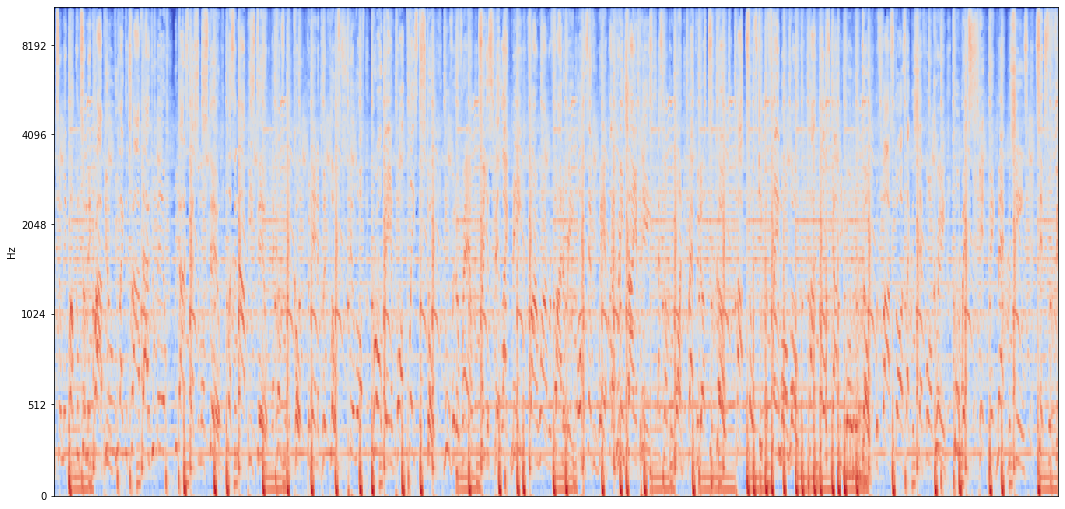

In [4]:
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)
fig = plt.figure(figsize = (18, 9))
librosa.display.specshow(librosa.power_to_db(mel_spec), y_axis='mel', )

In [5]:
mel_spec.shape

(128, 1291)

In [6]:
np.median(mel_spec)

0.23602791

In [8]:
mel_spec[0]

array([7.2322477e-04, 1.7661957e-02, 3.8863901e-02, ..., 1.5552990e-01,
       4.2189741e-01, 7.0143137e+00], dtype=float32)

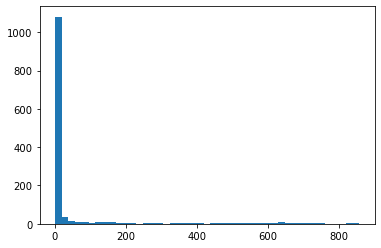

In [7]:
plt.hist(mel_spec[0], bins=45);

In [148]:
librosa.power_to_db(mel_spec)

array([[-31.407269 , -17.529612 , -14.104536 , ...,  -8.0818615,
         -3.7479315,   8.459852 ],
       [-31.747942 , -21.109116 , -19.105978 , ...,  17.340967 ,
         17.0167   ,  16.090622 ],
       [-35.82683  , -28.354301 , -23.021385 , ...,  17.582598 ,
         17.840704 ,  14.847217 ],
       ...,
       [-45.76808  , -38.574703 , -26.088001 , ...,  -8.709633 ,
        -11.535401 , -16.382727 ],
       [-46.266087 , -44.899715 , -29.764751 , ..., -13.251627 ,
        -16.34309  , -21.481075 ],
       [-46.266087 , -46.266087 , -40.165718 , ..., -22.814943 ,
        -24.556856 , -26.818304 ]], dtype=float32)

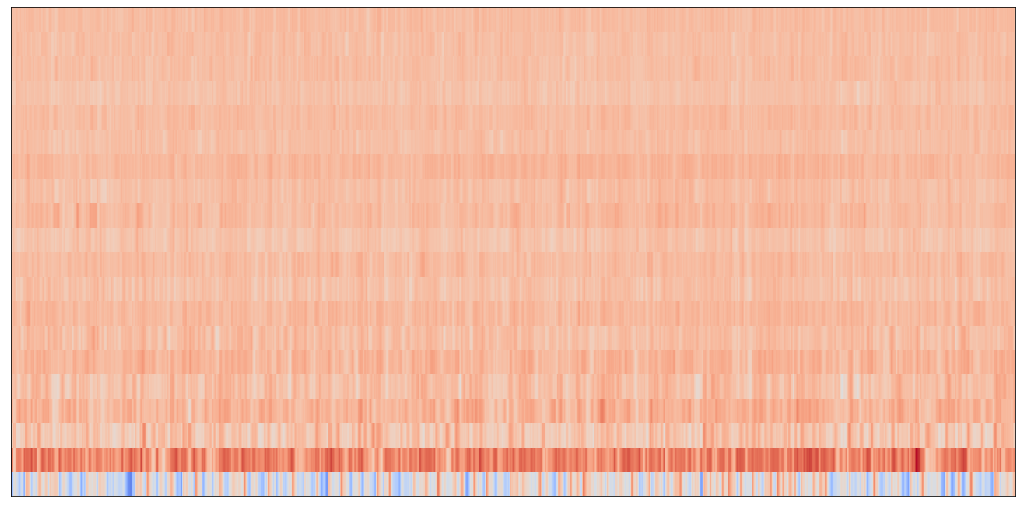

In [191]:
mfcc = librosa.feature.mfcc(y, sr)
fig = plt.figure(figsize = (18, 9))
librosa.display.specshow(mfcc)

In [192]:
mfcc.shape

(20, 1291)

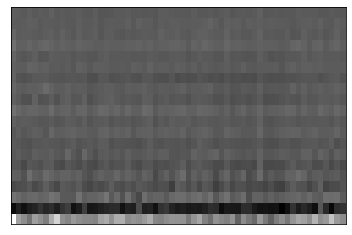

In [193]:
beat_mfcc = librosa.util.sync(mfcc, beat_frames, aggregate = np.median)
librosa.display.specshow(beat_mfcc, cmap='binary')
# plt.savefig('path')

In [194]:
beat_mfcc.shape

(20, 61)

In [195]:
64*82

5248

In [196]:
beat_mfcc

array([[-2.0251341e+02, -8.6648895e+01, -6.3457314e+01, ...,
        -1.2675959e+02, -7.7263046e+01, -6.2274197e+01],
       [ 9.4915955e+01,  6.9443146e+01,  8.9281540e+01, ...,
         9.8543205e+01,  5.4366615e+01,  4.7662727e+01],
       [-2.8509270e+01, -2.0216459e+01, -1.0049734e+01, ...,
        -2.1456257e+01, -2.4071198e+01, -1.0796115e+00],
       ...,
       [-1.4504568e+01, -2.6103346e+00, -4.4485288e+00, ...,
        -1.0032909e+00, -9.1069374e+00,  1.6190945e+00],
       [-3.8056111e+00, -2.1290786e+00, -3.2548988e+00, ...,
         1.4497383e+00, -6.6429305e+00, -2.6224108e+00],
       [-5.3070598e+00, -3.6416910e+00,  9.2166483e-02, ...,
        -6.4042759e-01,  1.7458739e+00,  3.1302099e+00]], dtype=float32)

In [197]:
y2, sr2 = librosa.load('../data/fma_small/000/000256.mp3')

/home/icculus/anaconda3/envs/audio_processing/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [199]:
mfcc2 = librosa.feature.mfcc(y2, sr)

In [200]:
mfcc2.shape, len(mfcc2.flatten())

((20, 1291), 25820)

In [201]:
mfcc.shape, len(mfcc.flatten())

((20, 1291), 25820)

In [ ]:
array = np.array()

In [202]:
dictionary = {'2':mfcc.flatten()}

In [203]:
dictionary['256'] = mfcc2.flatten()

In [204]:
dictionary

{'2': array([-299.54205  , -202.51341  , -159.97606  , ...,    7.3839045,
           7.447351 ,    1.6667306], dtype=float32),
 '256': array([-126.927216,  -19.111267,   16.271626, ...,  -10.445364,
          -7.988609,   -7.744216], dtype=float32)}

In [205]:
pd.DataFrame(dictionary).T

,0,1,2,3,4,5,6,7,8,9,...,25810,25811,25812,25813,25814,25815,25816,25817,25818,25819
2,-299.542053,-202.513412,-159.976059,-115.456413,-80.415169,-67.523239,-57.689396,-65.464790,-84.703659,-96.179939,...,6.299438,8.579011,3.017122,4.167839,4.247549,2.814877,7.809177,7.383904,7.447351,1.666731
256,-126.927216,-19.111267,16.271626,15.108659,24.803673,44.895332,51.896091,38.835415,16.508307,-3.405264,...,8.752542,5.392388,3.490000,2.651264,1.229231,-4.387732,-9.158469,-10.445364,-7.988609,-7.744216


In [130]:
beat_frames

array([   3,   21,   37,   52,   68,   84,   99,  115,  131,  146,  162,
        177,  193,  208,  223,  239,  255,  271,  287,  302,  317,  333,
        349,  364,  380,  395,  410,  426,  441,  457,  472,  488,  504,
        519,  535,  551,  566,  581,  597,  613,  628,  644,  660,  676,
        691,  706,  722,  737,  753,  769,  785,  800,  816,  831,  846,
        862,  878,  893,  909,  924,  940,  955,  971,  987, 1002, 1018,
       1033, 1049, 1065, 1080, 1096, 1111, 1127, 1142, 1158, 1174, 1189,
       1204, 1220, 1236, 1251])

In [134]:
len(beat_frames)

60

In [135]:
beat_frames

array([   3,   25,   45,   66,   88,  108,  125,  145,  167,  188,  209,
        230,  251,  272,  293,  314,  335,  355,  374,  394,  415,  437,
        457,  479,  500,  522,  542,  561,  582,  603,  625,  647,  668,
        690,  712,  735,  756,  777,  798,  820,  843,  867,  889,  910,
        931,  953,  975,  996, 1018, 1039, 1061, 1083, 1104, 1125, 1146,
       1168, 1189, 1209, 1229, 1250])